In [2]:
import pandas as pd
import numpy as np

# Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [9]:
cars = pd.read_csv("cars_sampled.csv", parse_dates=["dateCrawled", "dateCreated", "lastSeen"])

# Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [20]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [23]:
cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [24]:
cars.shape

(50001, 19)

In [55]:
cars.columns[cars.isna().any(axis=0)]

Index(['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage'], dtype='object')

In [60]:
cars.isna().sum(axis=0)

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [59]:
cars.nunique() == cars.shape[0]
#нет уникальных

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType            False
yearOfRegistration     False
gearbox                False
powerPS                False
model                  False
kilometer              False
monthOfRegistration    False
fuelType               False
brand                  False
notRepairedDamage      False
dateCreated            False
postalCode             False
lastSeen               False
dtype: bool

# Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

<AxesSubplot:>

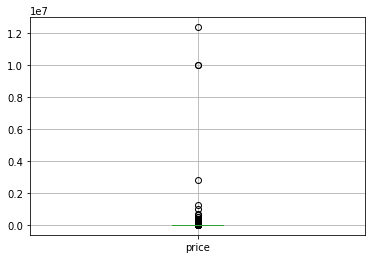

In [63]:
cars.boxplot("price")

In [69]:
q1 = cars.price.quantile(0.25)
q3 = cars.price.quantile(0.75)
rng = q3-q1
down_d = q1 - 1.5*rng
up_b = q3 + 1.5*rng

In [118]:
cars2 = cars[(cars.price<=up_b) * (down_d<=cars.price)]

<AxesSubplot:>

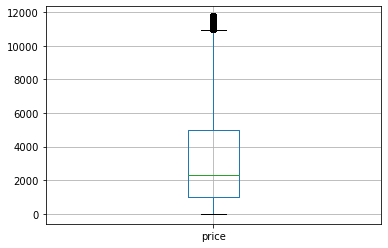

In [119]:
cars2.boxplot("price")

In [117]:
q1 = cars2.price.quantile(0.25)
q3 = cars2.price.quantile(0.75)
rng = q3-q1
down_d = q1 - 1.5*rng
up_b = q3 + 1.5*rng

<AxesSubplot:>

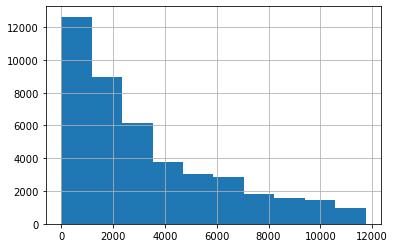

In [120]:
cars2.price.hist()